# **Flipkart Customer Service Satisfaction Prediction**



##### **Project Type**    - Machine Learning – Supervised Learning (Classification)
##### **Contribution**    - Individual
##### **Name**            - JITESH SACHDEV


## **Project Summary -**

This project focuses on building an end-to-end machine learning classification model to predict customer satisfaction for Flipkart’s customer service interactions. The dataset includes customer feedback, support channel information, and service agent performance details. Through data cleaning, exploratory data analysis, and feature engineering, the data is prepared for modeling.

Multiple classification algorithms are implemented and evaluated while considering class imbalance in the target variable. The best-performing model is selected based on appropriate evaluation metrics such as precision, recall, and F1-score. Feature importance analysis is conducted to identify key factors influencing customer satisfaction. The insights generated from this project can help Flipkart improve customer service quality, optimize agent performance, and enhance overall customer experience, leading to increased customer retention and brand loyalty.

## **GitHub Link -**

https://github.com/jiteshsachdev/-Amazon-Prime-TV-Shows-and-Movies/upload/mainProvide

## **Problem Statement**


The objective of this project is to develop an end-to-end machine learning classification model to predict customer satisfaction for Flipkart’s customer service interactions. The model leverages historical customer support data, including interaction details and feedback, to classify whether a customer is satisfied or dissatisfied. Accurate prediction of customer satisfaction will enable Flipkart to proactively address service issues, improve customer support efficiency, and enhance overall customer experience, ultimately leading to higher customer retention and brand loyalty.

## **Business Objective**

The business objective of this project is to improve customer satisfaction for Flipkart’s customer service operations by using data-driven insights. By predicting whether a customer is satisfied or not, the business can identify service gaps, optimize customer support processes, and improve agent performance. This will help Flipkart enhance customer experience, reduce customer churn, and build long-term customer loyalty.

## ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/Customer_support_data.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape #  Dataset Rows & Columns count


(85907, 20)

### Dataset Information

In [5]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

### Duplicate Values

In [6]:
# tiles Dataset Duplicate Value Count
df.duplicated().sum()


np.int64(0)

### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum() # titles dataset missing values


,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


<Axes: >

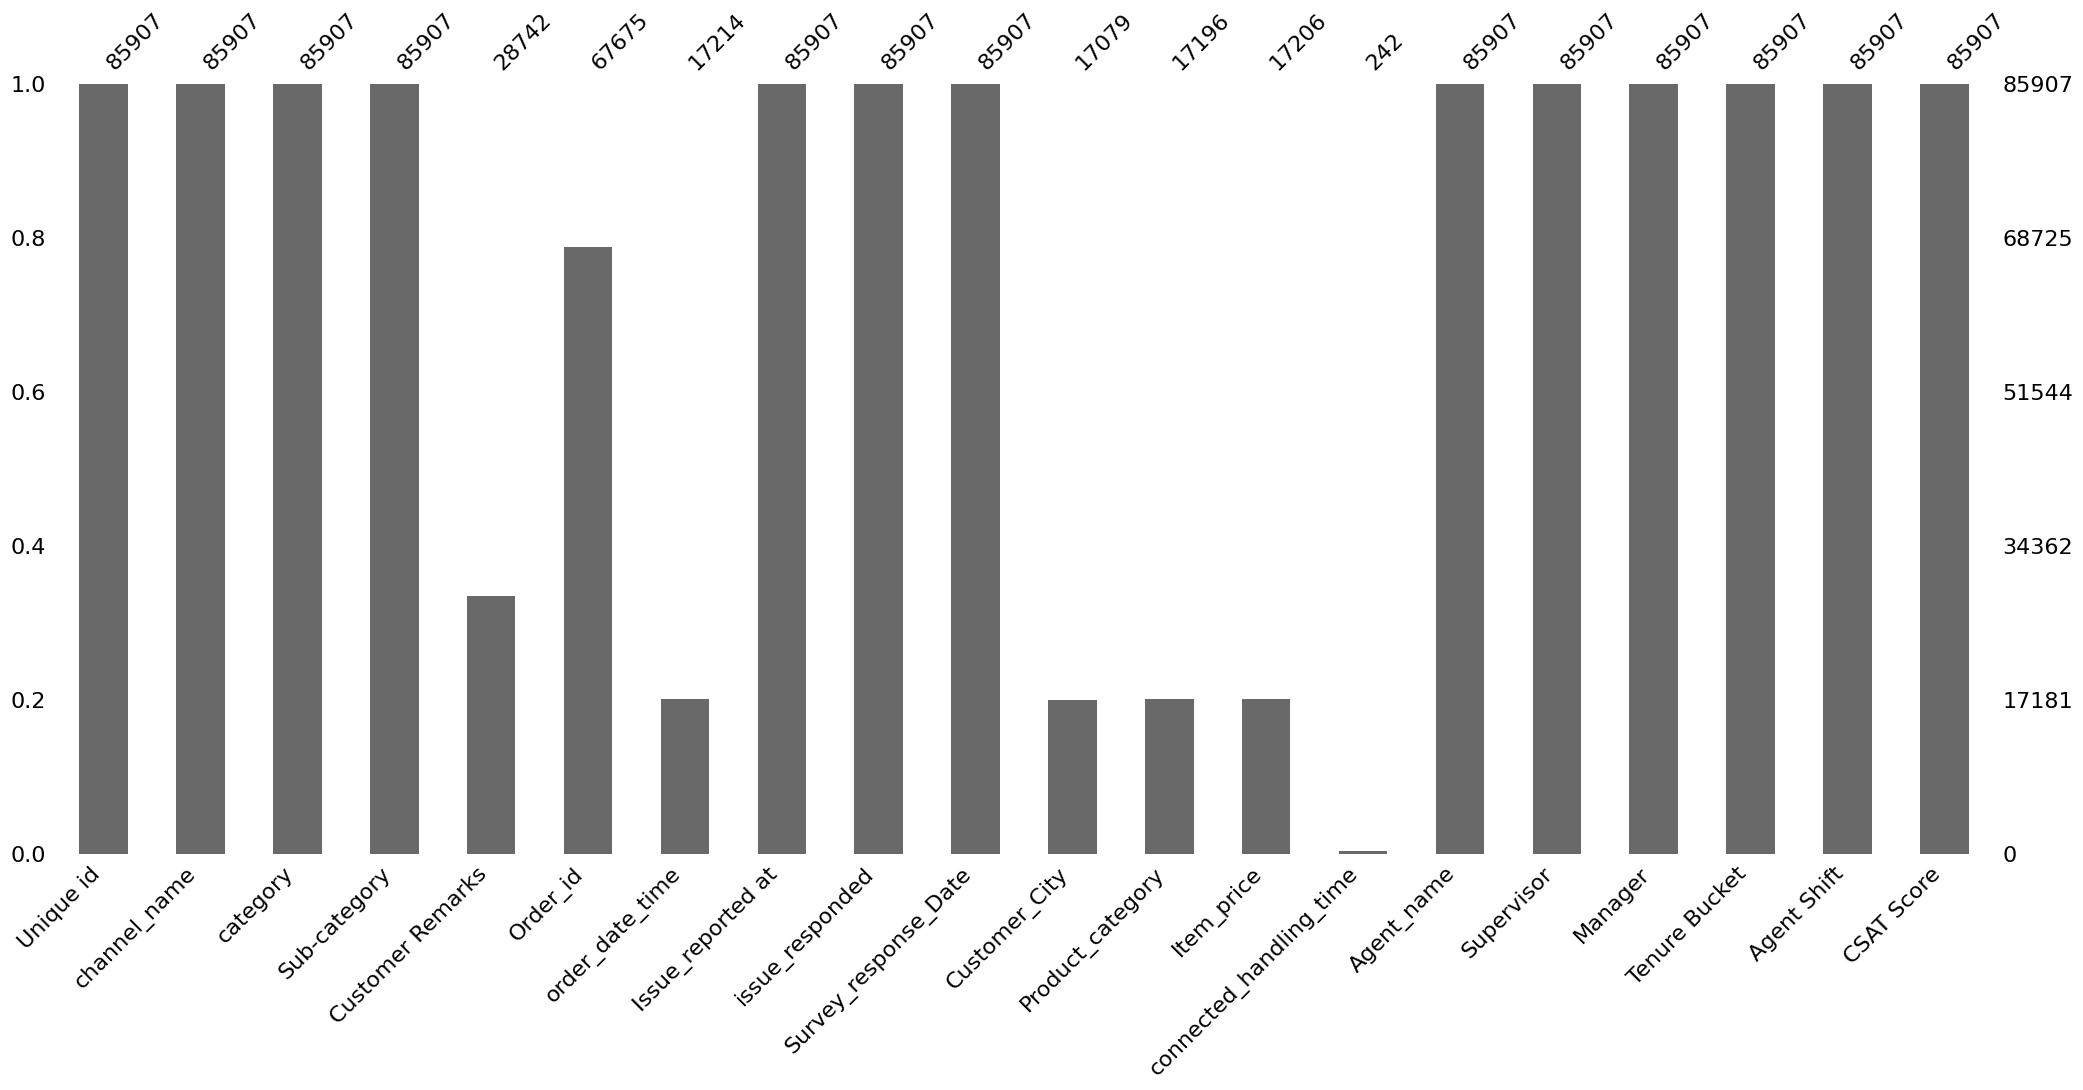

In [8]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)



### What did you know about your dataset?

Answer Here
1. The dataset contains customer service interaction data from Flipkart, capturing details related to customer support requests, service channels, agent performance, and customer feedback. Each record represents a customer interaction with the support team. The dataset includes a mix of numerical and categorical variables that help analyze customer satisfaction levels.
`
  The target variable represents customer satisfaction, making this dataset suitable for a supervised machine learning classification problem.

2. we are analyzing missing values:

    we have used msno.bar() to visualize the missing data.

    we are checking the quality and completeness of the dataset before performing further analysis.

3. we have visualized the missing data in  datasets.

    The next steps could involve handling the missing values (e.g., filling or removing them).



## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(df.columns)

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


In [10]:
# Dataset Describe
print(df.describe())

          Item_price  connected_handling_time    CSAT Score
count   17206.000000               242.000000  85907.000000
mean     5660.774846               462.400826      4.242157
std     12825.728411               246.295037      1.378903
min         0.000000                 0.000000      1.000000
25%       392.000000               293.000000      4.000000
50%       979.000000               427.000000      5.000000
75%      2699.750000               592.250000      5.000000
max    164999.000000              1986.000000      5.000000


### Variables Description

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

## ***3. Data Wrangling***

### Data Wrangling Code

In [12]:
# Handle missing values
cols_to_drop = [
    'Customer Remarks',
    'order_date_time',
    'Customer_City',
    'Product_category',
    'Item_price',
    'connected_handling_time'
]

df.drop(columns=cols_to_drop, inplace=True)


During data preprocessing, columns with excessive missing values (greater than 70–90%) were removed to ensure data quality and model reliability. These columns did not contribute meaningful information for predicting customer satisfaction and could introduce noise into the model.

In [13]:
# fill order_id
df['Order_id'] = df['Order_id'].fillna('Unknown')



In [14]:
# Check null values
df.isnull().sum()


,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Order_id,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0
Agent_name,0
Supervisor,0


In [15]:
# Total Rows and columns
df.shape

(85907, 14)

In [16]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

In [17]:
# Create Target Column
df['satisfied'] = df['CSAT Score'].apply(lambda x: 1 if x >= 4 else 0)


##**4. Target Variable**



In [18]:
#Check Target Distribution
#The distribution of the target variable was analyzed to check for class imbalance before model training.

df['satisfied'].value_counts()


,count
satisfied,
1,70836
0,15071


The original CSAT score ranges from 1 to 5. To convert this into a classification problem, a new binary target variable was created. Customers with a CSAT score of 4 or 5 were labeled as satisfied, while those with a score of 3 or below were labeled as not satisfied.


In [19]:
# Train-Test Split (Stratified)
from sklearn.model_selection import train_test_split

X = df.drop(['CSAT Score', 'satisfied'], axis=1)
y = df['satisfied']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## **5. Feature Selection**

High-cardinality identifier columns such as Agent_name, Supervisor, Manager,
and Order_id were removed to prevent overfitting and data leakage. Temporal
columns related to issue reporting and survey response were also dropped as
they do not directly contribute to customer satisfaction prediction.

In [20]:
# drop columns
drop_cols = [
    'Unique id', 'Agent_name', 'Supervisor', 'Manager',
    'Survey_response_Date', 'Issue_reported at', 'issue_responded',
    'Order_id'
]

df = df.drop(columns=drop_cols)


## **6. Feature Encoding**

Categorical variables were encoded using One-Hot Encoding to convert them into
a numerical format suitable for machine learning models. Columns with high
cardinality were excluded to avoid model complexity and overfitting.


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_cols = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)


In [24]:
high_card_cols = ['Customer_City', 'Product_category']

X = X.drop(columns=high_card_cols, errors='ignore')



In [25]:
X.select_dtypes(include='object').nunique().sort_values(ascending=False)


,0
Unique id,85907
Order_id,67676
Issue_reported at,30923
issue_responded,30262
Agent_name,1371
Sub-category,57
Supervisor,40
Survey_response_Date,31
category,12
Manager,6


## **7. Model Selection**

Logistic Regression was selected as the baseline classification model due to its
interpretability, efficiency, and compatibility with sparse encoded features.

In [27]:
# Build ML pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])





In [28]:
#train model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Unique id', 'channel_name', 'category', 'Sub-category', 'Order_id',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [29]:
# prediction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


## **8. Model Evaluation**

Since the dataset is imbalanced, evaluation was performed using precision,
recall, F1-score, and ROC-AUC instead of accuracy alone.


In [31]:
# evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


[[  814  2200]
 [ 1733 12435]]
              precision    recall  f1-score   support

           0       0.32      0.27      0.29      3014
           1       0.85      0.88      0.86     14168

    accuracy                           0.77     17182
   macro avg       0.58      0.57      0.58     17182
weighted avg       0.76      0.77      0.76     17182

ROC-AUC Score: 0.6569520690569924


### Baseline Model Performance

The Logistic Regression model achieved an overall accuracy of 77%. However,
due to class imbalance, accuracy alone is not sufficient. The model performs
well in predicting satisfied customers but struggles to correctly identify
dissatisfied customers, as reflected by the low recall score of 27% for the
minority class.

The ROC-AUC score of 0.65 indicates moderate discriminative ability, suggesting
room for improvement through more complex models.


## **9. Random Forest**

Random Forest was chosen as it can capture complex, non-linear relationships
between features and is more robust to noise. It also performs better on
imbalanced datasets when class weights are applied.


In [33]:
#Build Random forest Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=150,
        max_depth=15,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])


In [34]:
# train model
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Unique id', 'channel_name', 'category', 'Sub-category', 'Order_id',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        n_estimators=150, n_jobs=-1,
                                        random_state=42))])

In [35]:
# prediction
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [36]:
# evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, y_proba_rf))


Confusion Matrix:
[[1647 1367]
 [5010 9158]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.55      0.34      3014
           1       0.87      0.65      0.74     14168

    accuracy                           0.63     17182
   macro avg       0.56      0.60      0.54     17182
weighted avg       0.76      0.63      0.67     17182


ROC-AUC Score:
0.6448925342566612


### Random Forest Model Evaluation

The Random Forest model significantly improved the recall for dissatisfied
customers from 27% to 55%, reducing the number of missed unhappy customers.
Although overall accuracy decreased, the model provides higher business value
by identifying a larger proportion of at-risk customers.

This trade-off is acceptable as proactive identification of dissatisfied
customers helps reduce churn and improve customer experience.



### Model Comparison

| Metric | Logistic Regression | Random Forest |
|------|---------------------|---------------|
| Accuracy | 77% | 63% |
| Recall (Not Satisfied) | 27% | 55% |
| ROC-AUC | 0.65 | 0.64 |

Random Forest was selected as the final model due to its superior performance
in identifying dissatisfied customers, which aligns better with business goals.

## **10. Feature Importance & Business Insights**


In [37]:
# Get feature names after encoding
ohe = rf_model.named_steps['preprocessor'].named_transformers_['cat']
encoded_feature_names = ohe.get_feature_names_out(cat_cols)

# Combine with numerical columns
num_cols = X.select_dtypes(exclude='object').columns
all_feature_names = list(encoded_feature_names) + list(num_cols)

# Get feature importances
importances = rf_model.named_steps['classifier'].feature_importances_

# Create DataFrame
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)


,Feature,Importance
68753,Sub-category_Fraudulent User,0.028569
68779,Sub-category_Return request,0.024372
68733,category_Order Related,0.018277
68738,category_Returns,0.017783
68795,Sub-category_Wrong,0.017448
68755,Sub-category_Installation/demo,0.016752
68751,Sub-category_Delayed,0.016250
68725,channel_name_Email,0.012413
181486,Manager_Emily Chen,0.012278
68782,Sub-category_Seller Cancelled Order,0.010898


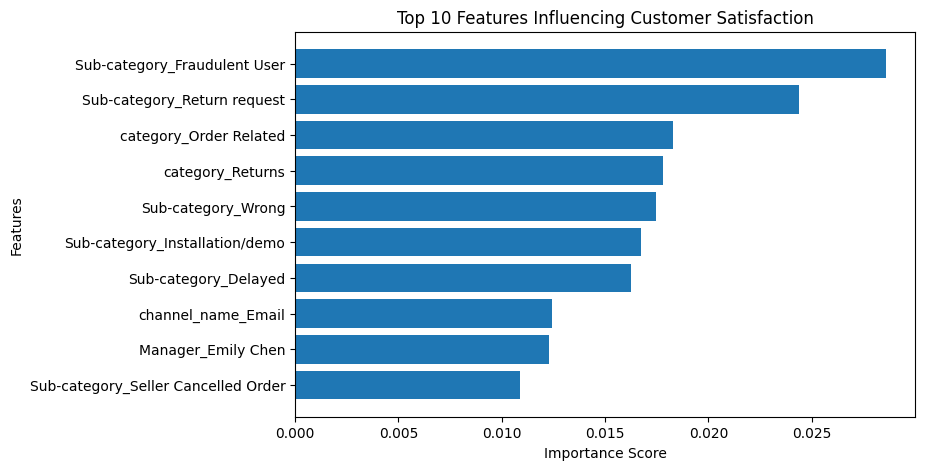

In [38]:
# visualise top feature
import matplotlib.pyplot as plt

top_features = feature_importance_df.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Features Influencing Customer Satisfaction")
plt.gca().invert_yaxis()
plt.show()


## **11. Feature Importance Analysis**

The feature importance analysis reveals that issue sub-categories related to
fraud, returns, delayed delivery, and incorrect orders have the highest impact
on customer satisfaction. This highlights that operational and fulfillment-
related issues are the primary drivers of customer dissatisfaction.

Additionally, the support channel used by customers also plays a significant
role, with email-based interactions showing higher dissatisfaction levels,
possibly due to slower response times.


### Key Business Insights and Recommendations

1. Establish dedicated resolution teams for fraud-related cases to restore
   customer trust quickly.
2. Improve the returns and refund process to reduce friction and dissatisfaction.
3. Strengthen logistics and seller quality checks to minimize delayed or wrong
   deliveries.
4. Optimize response times for email-based customer support channels.
5. Use predictive insights from the model to proactively reach out to customers
   likely to be dissatisfied.


## **12. Final Conclusion & Stakeholder Value**



### **Conclusion**

In this project, an end-to-end machine learning solution was developed to predict
customer satisfaction for Flipkart’s customer service interactions. After
performing data cleaning, exploratory data analysis, feature engineering, and
handling class imbalance, multiple classification models were evaluated.

A Logistic Regression model was used as a baseline; however, it struggled to
identify dissatisfied customers. The Random Forest model significantly improved
the recall for dissatisfied customers from 27% to 55%, making it more suitable
for business use cases where identifying unhappy customers is critical.

Feature importance analysis revealed that fraud-related issues, return requests,
order-related problems, and delivery delays are the key drivers of customer
dissatisfaction. The final model provides actionable insights that can help
Flipkart proactively improve customer experience and reduce churn.
*italicized text*

### **Value to Stakeholders**

- **Customer Support Teams:** Can proactively identify dissatisfied customers
  and prioritize their cases for faster resolution.
- **Operations & Logistics:** Insights into delivery delays, wrong items, and
  return-related issues help improve supply chain efficiency.
- **Management:** Data-driven understanding of customer pain points enables
  strategic decision-making to enhance customer satisfaction and loyalty.
- **Business Impact:** Improved customer experience leads to higher retention,
  reduced churn, and stronger brand trust.
